# Financial Data Extraction using YFinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath('..'))

from scripts.yfinance_data_extraction import fetch_data
import scripts.data_preprocessing as dp

In [2]:
#fetch data
tickers = ["TSLA", "BND", "SPY"]
data = fetch_data(tickers)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Dataset preview

In [3]:
data.shape

(2535, 15)

In [4]:
data.head()

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573112  172.592865  14.620667  62.603397  173.811099   
2015-01-05  62.754787  169.475891  14.006000  62.777499  171.702294   
2015-01-06  62.936512  167.879608  14.085333  63.125783  170.316050   
2015-01-07  62.974380  169.971619  14.063333  63.050088  170.316085   
2015-01-08  62.875980  172.987717  14.041333  62.921404  173.206165   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398980  171.542672  14.217333  62.406553   
2015-01-05  14.433333  62.610939  169.165038  13.810667  62.641224   
2015-01-06  14.280000  62.860805  167.073055  13.614000  62.860805   
2015-01-07  14.318667  62.875961  168.770204  13.985333  62.944096   
2015-01-08  14.253333  62.815412  171.383032  14.000667  62.921404   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  173.391022  14.858000  2218800  121465900  71466000  
2015-01-05  171.534266  14.303333  5820100  169632600  80527500  
2015-01-06  169.786749  14.004000  3887600  209151400  93928500  
2015-01-07  169.223882  14.223333  2433400  125346700  44526000  
2015-01-08  171.399826  14.187333  1873400  147217800  51637500

In [5]:
# Data statistics summayy
data.describe()

Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean      69.289451   316.067402   117.848209    69.391261   317.725660   
std        4.792146   117.926909   116.508288     4.800409   118.486409   
min       61.860893   156.800797     9.578000    61.937388   157.864090   
25%       65.565281   214.841972    17.228000    65.630154   215.702253   
50%       68.329124   277.117920    30.298000    68.457877   277.919549   
75%       72.879948   405.869202   221.525002    72.946443   409.134310   
max       78.823273   609.750000   479.859985    78.920180   610.780029   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     120.474827    69.186012   314.157889   115.097514    69.293224   
std      119.236025     4.782142   117.269902   113.698930     4.793200   
min       10.331333    61.822654   154.676927     9.403333    61.891488   
25%       17.527667    65.475475   214.206923    16.942000    65.552704   
50%       32.329334    68.169747   276.073642    29.760000    68.310234   
75%      226.696671    72.728790   402.830888   217.061661    72.845714   
max      488.540009    78.788036   606.799988   457.510010    78.884950   

Price                                   Volume                              
Ticker          SPY         TSLA           BND           SPY          TSLA  
count   2535.000000  2535.000000  2.535000e+03  2.535000e+03  2.535000e+03  
mean     316.021384   117.877662  4.233200e+06  8.714655e+07  1.120308e+08  
std      117.921618   116.611575  2.796083e+06  4.487253e+07  7.387509e+07  
min      156.354898     9.488000  0.000000e+00  2.027000e+07  1.062000e+07  
25%      214.972477    17.259334  2.057700e+06  5.862005e+07  6.680295e+07  
50%      277.230689    31.299999  3.805800e+06  7.642870e+07  9.264180e+07  
75%      406.100286   222.653336  5.626700e+06  1.018866e+08  1.294283e+08  
max      609.809998   475.899994  3.193720e+07  5.072443e+08  9.140820e+08

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, BND)    2535 non-null   float64
 1   (Close, SPY)    2535 non-null   float64
 2   (Close, TSLA)   2535 non-null   float64
 3   (High, BND)     2535 non-null   float64
 4   (High, SPY)     2535 non-null   float64
 5   (High, TSLA)    2535 non-null   float64
 6   (Low, BND)      2535 non-null   float64
 7   (Low, SPY)      2535 non-null   float64
 8   (Low, TSLA)     2535 non-null   float64
 9   (Open, BND)     2535 non-null   float64
 10  (Open, SPY)     2535 non-null   float64
 11  (Open, TSLA)    2535 non-null   float64
 12  (Volume, BND)   2535 non-null   int64  
 13  (Volume, SPY)   2535 non-null   int64  
 14  (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 316.9 KB


In [7]:
#check missing value
data.isnull().sum()

Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64

# Stock Financial Data Time Series Analysis and EDA

In [8]:
# Extract adjust Close Prices
close_prices = data['Close'].copy()
tickers = ["TSLA", "BND", "SPY"]

### Close prices trends over time

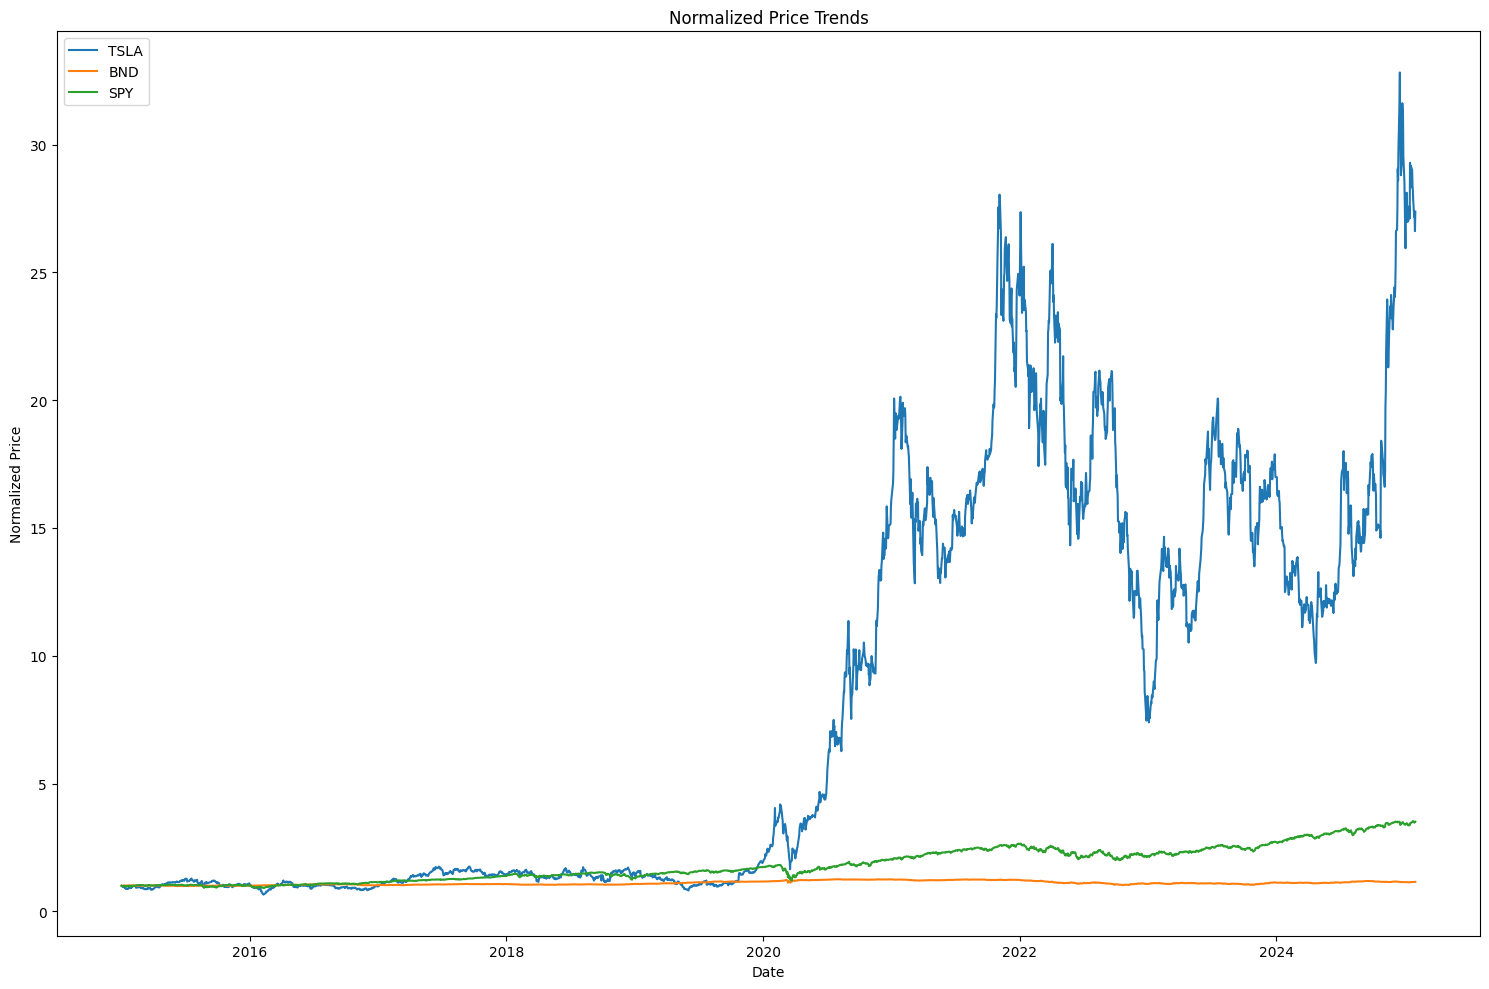

In [9]:
dp.close_price_trends(close_prices, tickers)

**TESLA:** Have high volatility over time

### Daily change Percantage

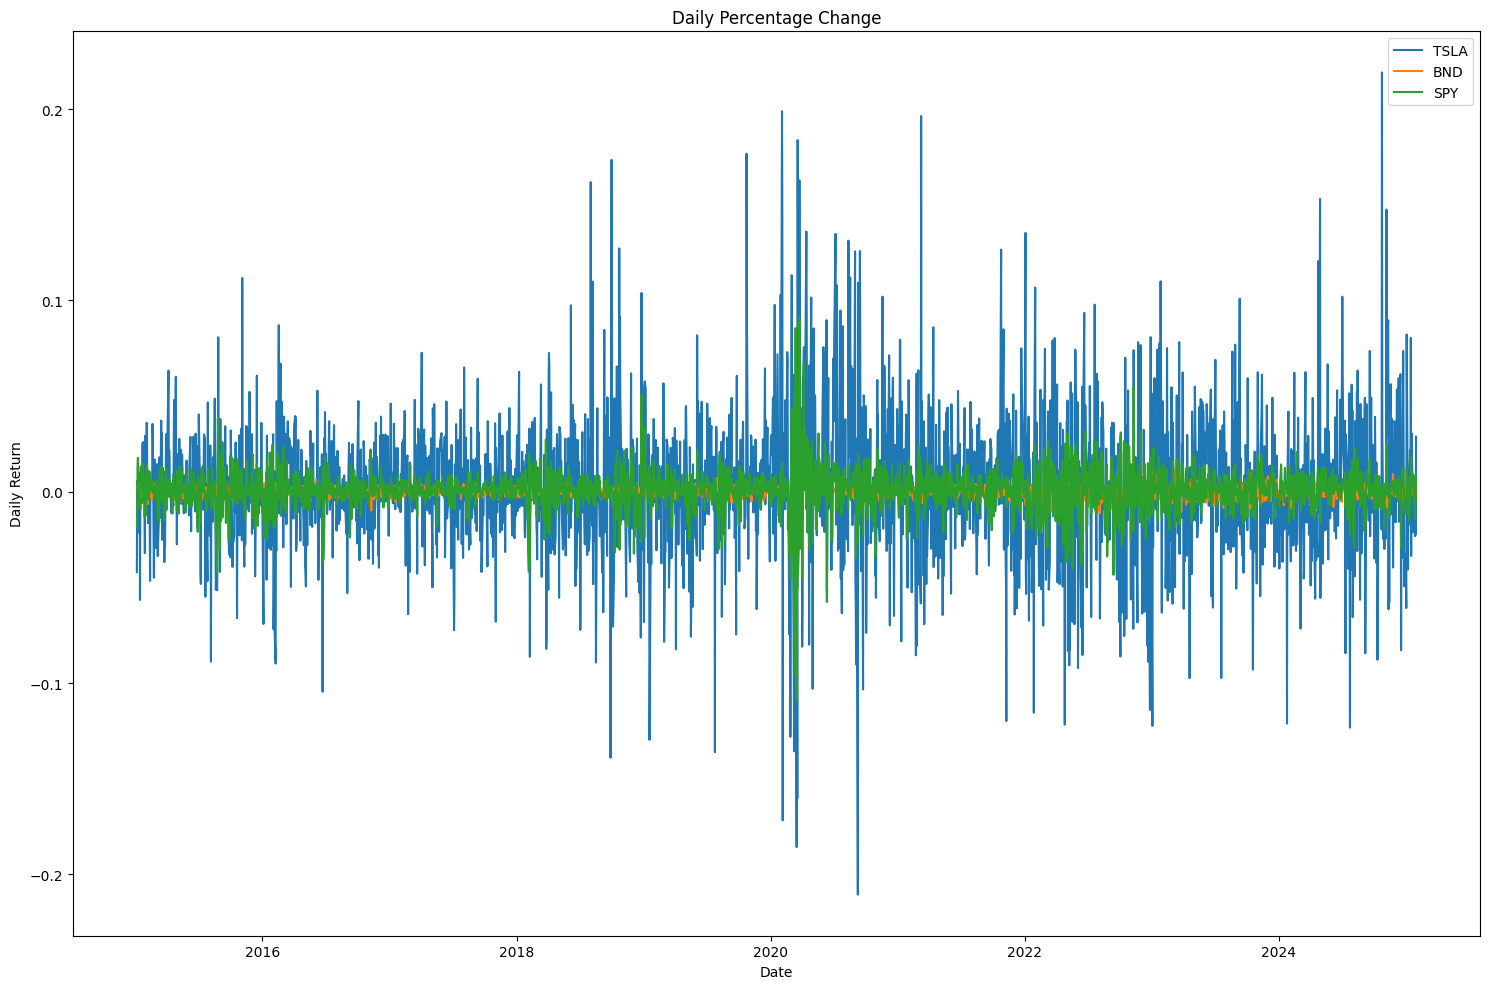

In [10]:
dp.daily_returns(close_prices, tickers)

### Rolling Mean and Standard Deviation for Volatility Analysis

* **Rolling Mean (Average Returns):** Indicates the smoothed trend of stock returns over time.

* **Rolling Standard Deviation (Volatility Measure):** Represents the fluctuations in stock returns over a given window.

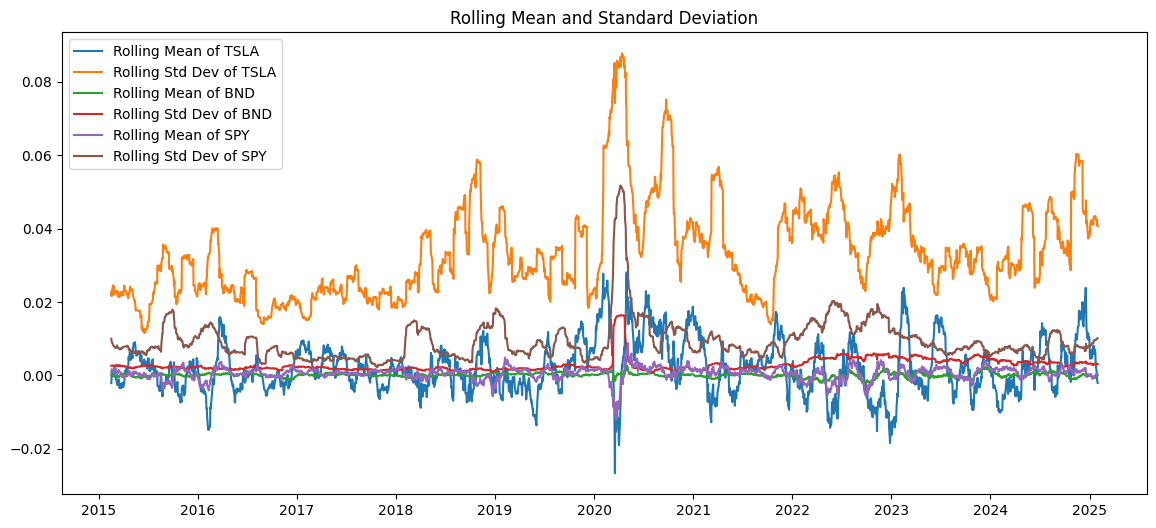

In [11]:
dp.rolling_statistics(close_prices, tickers)

**Interpretation:**
* TSLA (Tesla) shows high volatility with noticeable spikes around 2020, likely due to market disruptions and stock surges.
* BND (Bond ETF) has relatively low volatility, indicating stable returns typical of bond investments.
* SPY (S&P 500 ETF) shows moderate volatility, reflecting the broad market’s risk exposure.
Takeaway:

Stocks with higher standard deviations (e.g., TSLA) are riskier but may offer higher returns. Bonds (BND) provide stability with lower risk but also lower returns.


### Seasonality and Trend Analysis and Key Statistics


Decomposing Time Series for TSLA


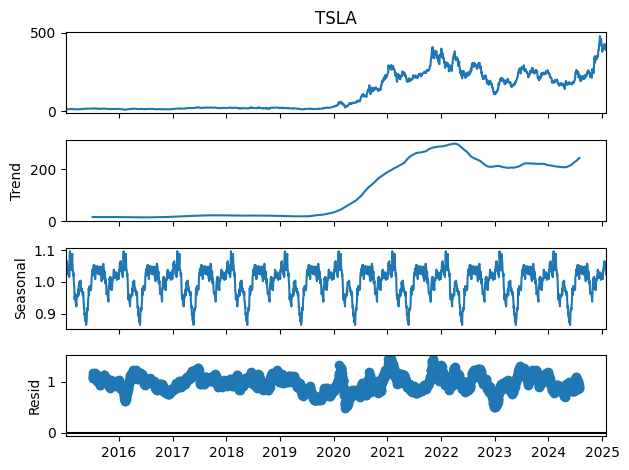


Decomposing Time Series for BND


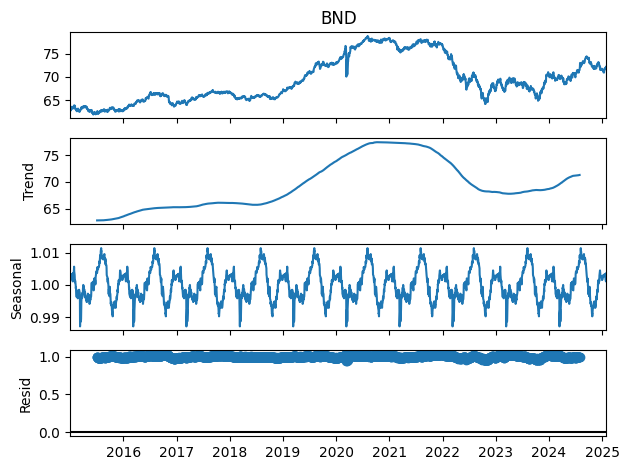


Decomposing Time Series for SPY


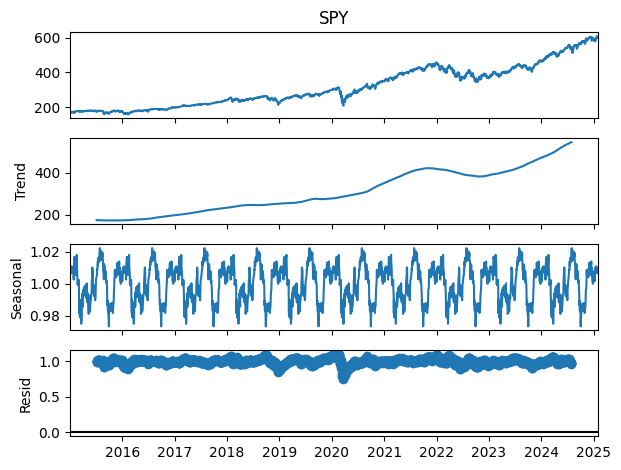

In [12]:
dp.seasonality_trend_analysis(close_prices, tickers)

In [13]:
# key statistics
dp.key_statistics(close_prices)


Summary statistics of daily returns:
        annualized_return  annualized_volatility  sharpe_ratio
Ticker                                                        
BND              0.015721               0.054400      0.288985
SPY              0.140314               0.175939      0.797518
TSLA             0.491944               0.571570      0.860690


**Summary of Daily Returns:**
* BND (Bond ETF): Low return (1.57%) and low volatility (5.44%), making it a stable but low-reward investment.
* SPY (S&P 500 ETF): Moderate return (14.03%) with moderate volatility (17.59%), offering a balanced risk-reward profile.
* TSLA (Tesla): High return (49.19%) but extremely volatile (57.16%), indicating high risk with potentially high reward.

**Sharpe Ratio Insight:**

* TSLA (0.86) has the highest risk-adjusted return, followed by SPY (0.80) and BND (0.29), suggesting that while TSLA is highly volatile, it offers better returns per unit of risk compared to SPY and BND.

### Stationary Chack

In [14]:
for ticker in tickers:
    dp.adf_test(close_prices[ticker], ticker)


ADF Test for TSLA Closing Prices:
ADF Statistic: -0.5687280656291525
p-value: 0.8778928052253298
Critical Values:
	1%: -3.4329610922579095
	5%: -2.8626935681060375
	10%: -2.567384088736619
Non-Stationary (Fail to Reject H0)

ADF Test for BND Closing Prices:
ADF Statistic: -1.4722685090798813
p-value: 0.5471824058212453
Critical Values:
	1%: -3.4329579682301254
	5%: -2.8626921885291017
	10%: -2.5673833542324727
Non-Stationary (Fail to Reject H0)

ADF Test for SPY Closing Prices:
ADF Statistic: 0.9362269203850971
p-value: 0.993545345166943
Critical Values:
	1%: -3.4329434877271816
	5%: -2.862685793891119
	10%: -2.567379949649765
Non-Stationary (Fail to Reject H0)


**Stationarity Check (ADF Test Results)** 
* The Augmented Dickey-Fuller (ADF) test checks if a time series is stationary (i.e., has constant mean and variance over time).

**Key Takeaways:**
* Null Hypothesis (H₀): The time series is non-stationary (has a unit root).
* Alternative Hypothesis (H₁): The time series is stationary.
* If p-value < 0.05, we reject H₀ and conclude the series is stationary.

**Results Analysis:**
* TSLA: ADF = -0.57, p-value = 0.878 → Non-stationary
* BND: ADF = -1.47, p-value = 0.547 → Non-stationary
* SPY: ADF = 0.94, p-value = 0.994 → Non-stationary

All three assets fail to reject H₀, meaning their closing prices are non-stationary (trending over time).

**Implications:**
Non-stationarity means past prices influence future prices, making statistical forecasting less reliable.

### Autocorrelation and Partial Autocorrelation Plots for ARIMA

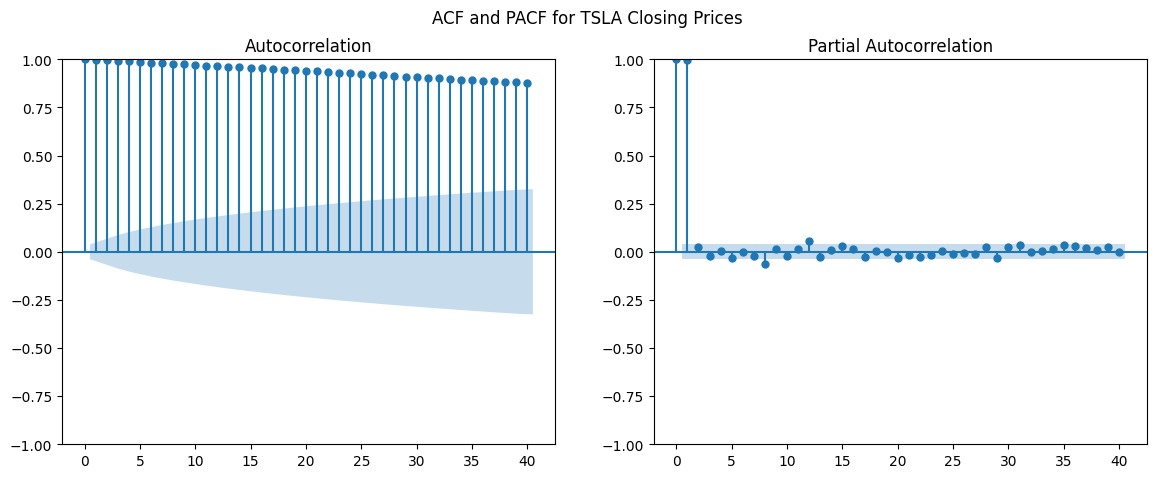

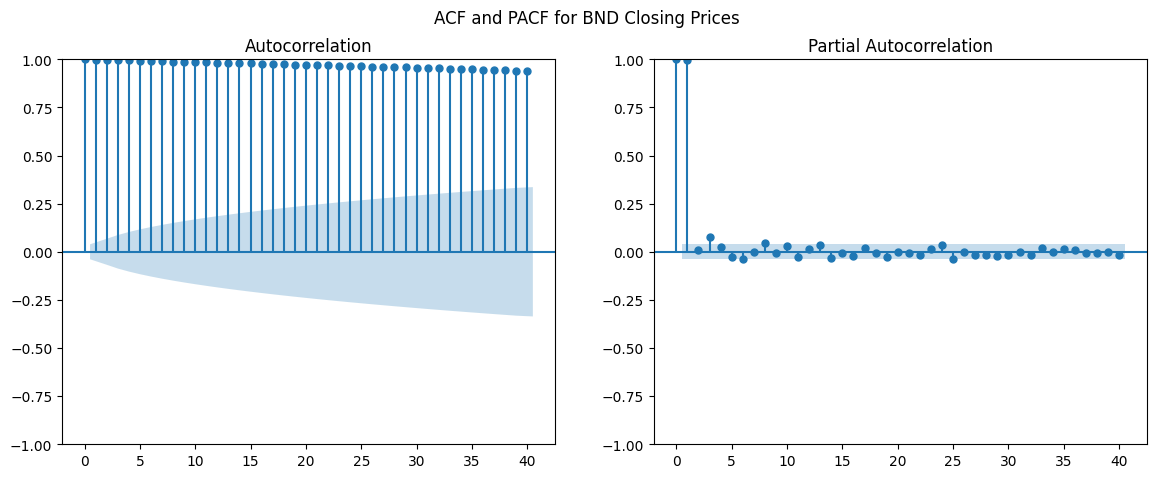

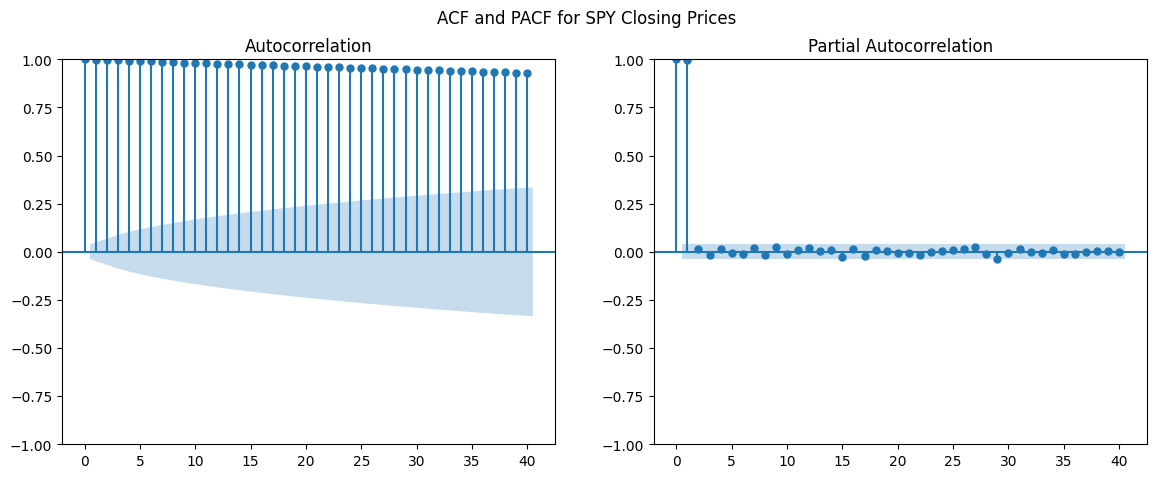

In [15]:
dp.autocorrelation(close_prices, tickers)